In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import corner
import pygravlens as gl
import pygravlens_shifts as gls
from astropy.cosmology import Planck15 as cosmo
from scipy.interpolate import RectBivariateSpline
from astropy import units as u
import matplotlib
import pickle
import time
import clensmod as cl

plt.rcParams.update({'font.size': 16, 'text.usetex': True, "font.family": "Times New Roman"})

In [2]:
lensmodel = cl.lens('Data/Matrix 1200 Pixels/data_dictionary.npy', 'Data/Matrix 1200 Pixels/kappa_', 75)
model,mybox, defarr, kaparr = lensmodel.lensmodel(50, 98, 1,output = True)

number of planes: 49
maingrid: [[-2.5, 2.5, 20], [-2.5, 2.5, 20]]
galgrid: [1e-06, 2.5, 20, 20]
model is 3d
position mode: fix
beta: [0.49882918 0.33176212 0.39714392 0.16466858 0.14079065 0.12287913
 0.19608719 0.0886721  0.14964698 0.06911156 0.0643276  0.11319086
 0.05315926 0.09540071 0.04517527 0.08224039 0.03918248 0.07210868
 0.03451787 0.0928787  0.02969903 0.05561344 0.05210932 0.02517797
 0.04754335 0.04487935 0.04246898 0.0402777  0.03827727 0.03644387
 0.03475769 0.03320179 0.04676357 0.04390655 0.02802291 0.02693923
 0.02592428 0.04844721 0.02323349 0.033187   0.03156093 0.03006204
 0.02867648 0.02739236 0.03453071 0.02473529 0.02372216 0.03717924
 0.36065506]
epsilon: [0.         0.33331949 0.79993042 0.24996343 0.71420334 0.74989991
 1.39968572 0.36353542 1.53799745 0.39271908 0.86645161 1.64640931
 0.41648339 1.69922009 0.42835654 1.7382332  0.43725587 1.76822125
 0.44417439 2.5978639  0.29006244 1.81695397 0.88488224 0.45799802
 1.84074801 0.89908757 0.90382316 0.90812

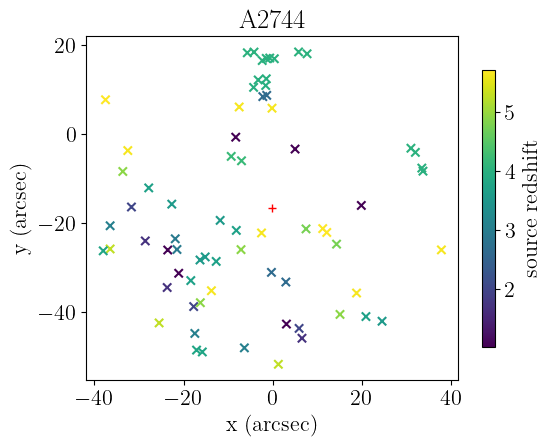

Computing deflection statistics A2744
los: $\langle \mu \rangle = -5.265e-02$ ; $\langle \sigma \rangle = 9.804e+00$ ; RMS = 1.411e+01
fg:  $\langle \mu \rangle$ = -4.118e-04  $\langle \sigma \rangle$ = 1.772e-01


C:\Users\abmad\Fall_2022_Analysis\clensmod.py:233: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


Total time taken: 34.56 minutes


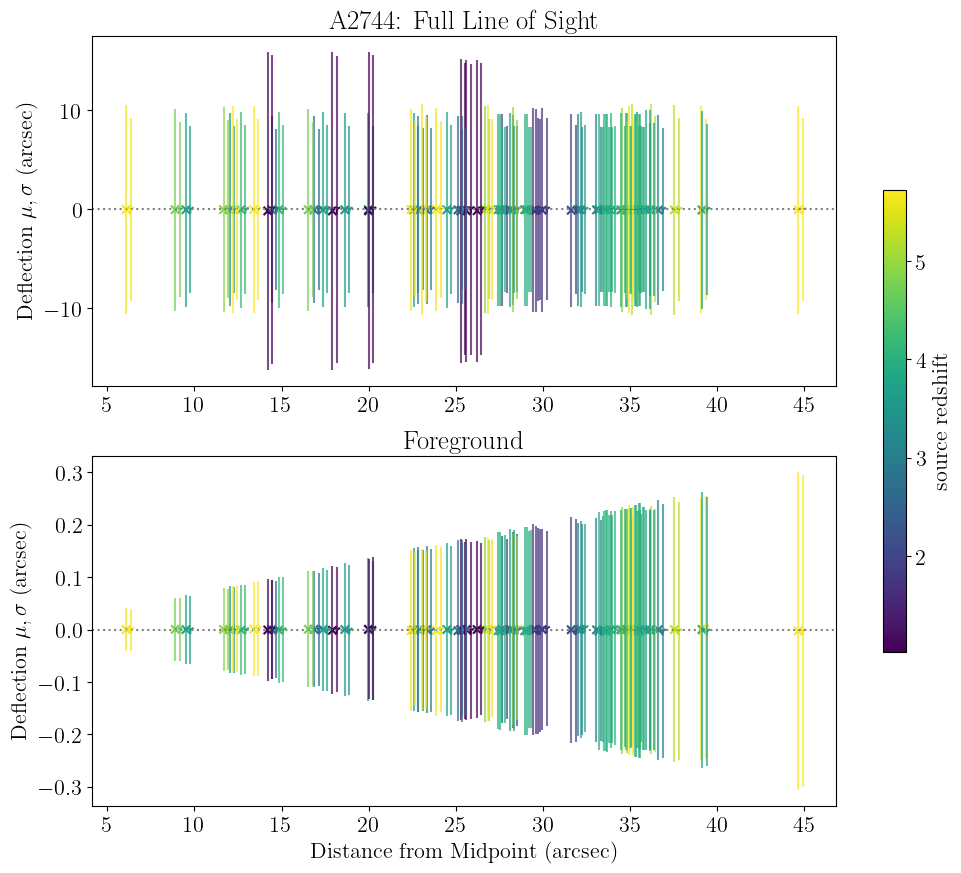

In [3]:
t1 = time.time()
a2744 = cl.clusterclass('abell2744-img.txt',0.308,clusname='A2744')
info_a2744 = a2744.DefStats(model,Nsamp= 10000, box = mybox)
a2744.plot_DefStats()
t2 = time.time()
print(f'Total time taken: {np.round((t2 - t1)/60, 2)} minutes')

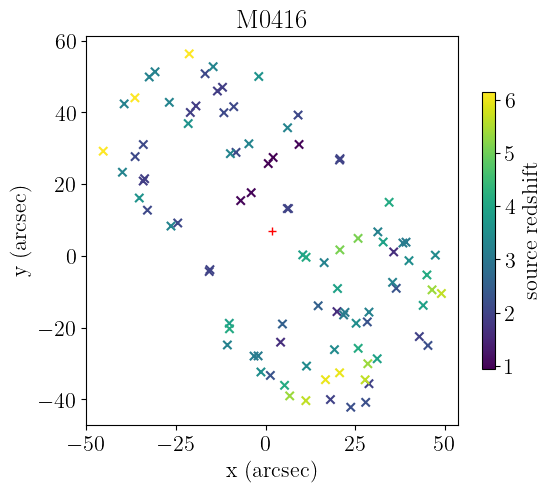

Computing deflection statistics M0416
los: $\langle \mu \rangle = -5.534e-02$ ; $\langle \sigma \rangle = 1.085e+01$ ; RMS = 1.542e+01
fg:  $\langle \mu \rangle$ = 1.633e-03  $\langle \sigma \rangle$ = 3.413e-01
Total time taken: 38.38 minutes


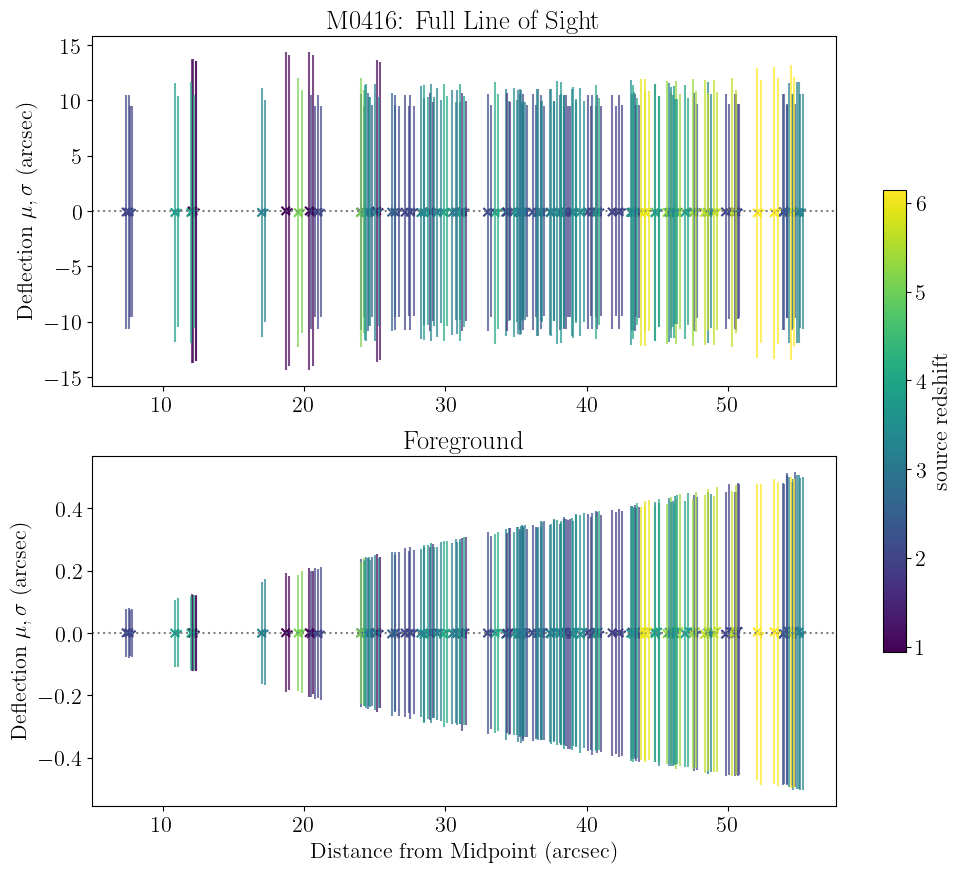

In [4]:
t1 = time.time()
m0416 = cl.clusterclass('macs0416-img.txt',0.396,clusname='M0416')
info = m0416.DefStats(model,Nsamp= 10000, box = mybox)
m0416.plot_DefStats()
t2 = time.time()
print(f'Total time taken: {np.round((t2 - t1)/60, 2)} minutes')

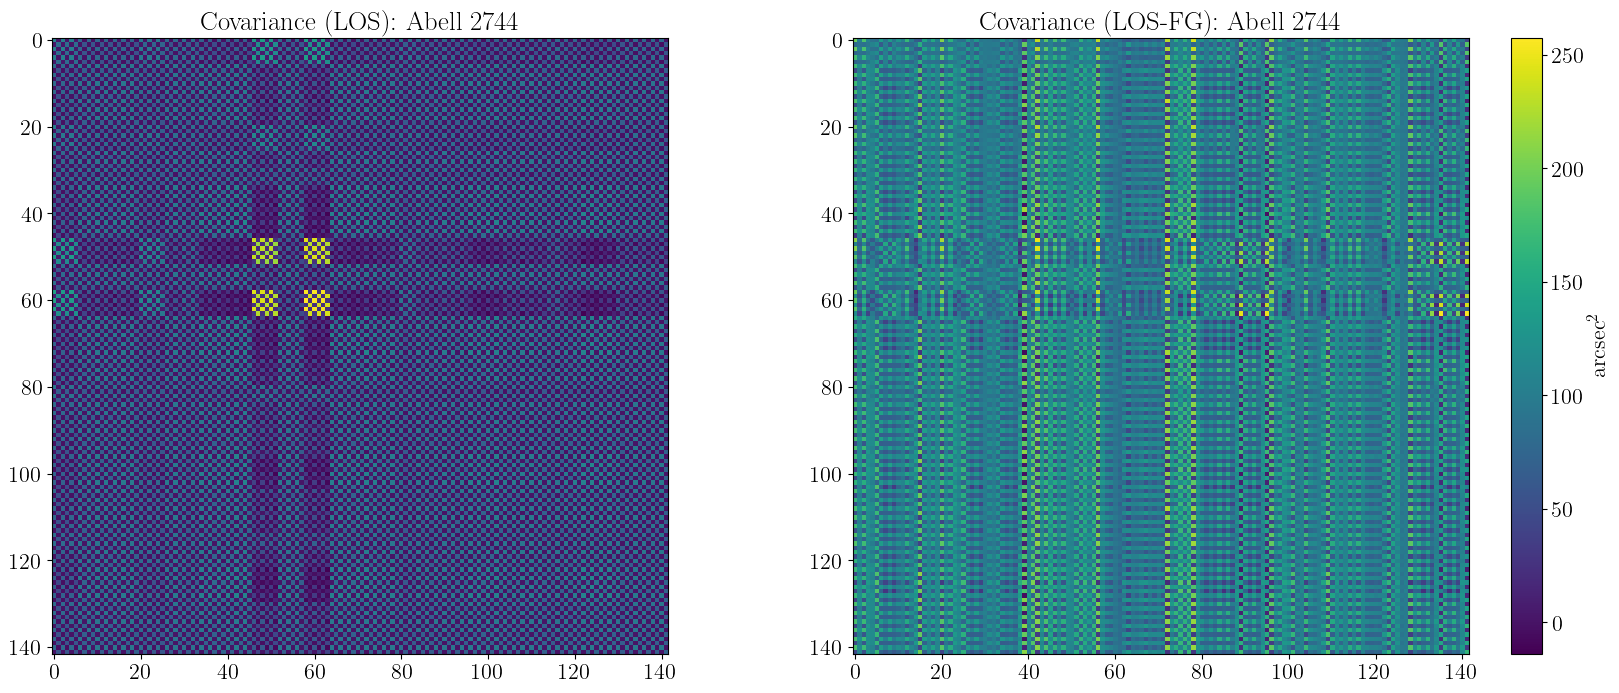

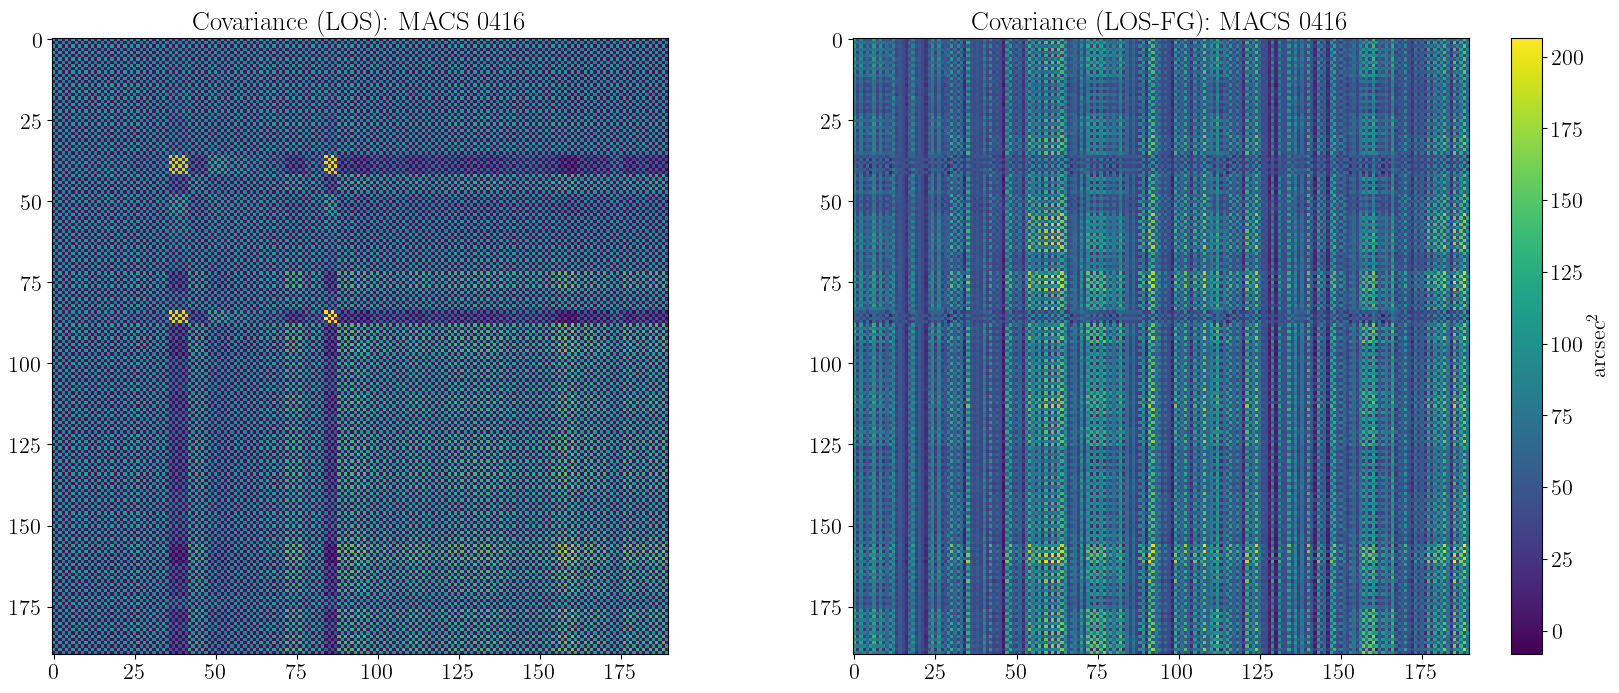

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (22, 8))

im1 = ax[0].imshow(info_a2744['LOS'][1], interpolation = 'nearest')
ax[0].set_title('Covariance (LOS): Abell 2744')

ax[1].imshow(info_a2744['LOSFG'][0], interpolation = 'nearest')
ax[1].set_title('Covariance (LOS-FG): Abell 2744')

cmap = matplotlib.cm.viridis
norm = matplotlib.colors.Normalize(vmin=np.min([np.min(info_a2744['LOSFG'][0]), np.min(info_a2744['LOS'][1])]), vmax=np.max([np.max(info_a2744['LOSFG'][0]), np.max(info_a2744['LOS'][1])]))

fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap), label = '$\mathrm{{arcsec}}^2$')
fig.subplots_adjust(wspace=0.001)
plt.savefig('Abell_Covar.png', bbox_inches = 'tight')
plt.show()
#
fig, ax = plt.subplots(1, 2, figsize = (22, 8))

im1 = ax[0].imshow(info['LOS'][1], interpolation = 'nearest')
ax[0].set_title('Covariance (LOS): MACS 0416')

ax[1].imshow(info['LOSFG'][0], interpolation = 'nearest')
ax[1].set_title('Covariance (LOS-FG): MACS 0416')

cmap = matplotlib.cm.viridis
norm = matplotlib.colors.Normalize(vmin=np.min([np.min(info['LOSFG'][0]), np.min(info['LOS'][1])]), vmax=np.max([np.max(info['LOSFG'][0]), np.max(info['LOS'][1])]))

fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap), label = '$\mathrm{{arcsec}}^2$')
fig.subplots_adjust(wspace=0.001)
plt.savefig('Macs_Covar.png', bbox_inches = 'tight')
plt.show()

gamma mean,std: 0.0008548682128482653 0.07948442548461866


C:\Users\abmad\AppData\Local\Temp\ipykernel_38908\92722850.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax[0].plot(kap_x, p, 'k', linewidth=2, color = 'black', linestyle = 'dashed',label = 'gausk')
C:\Users\abmad\AppData\Local\Temp\ipykernel_38908\92722850.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


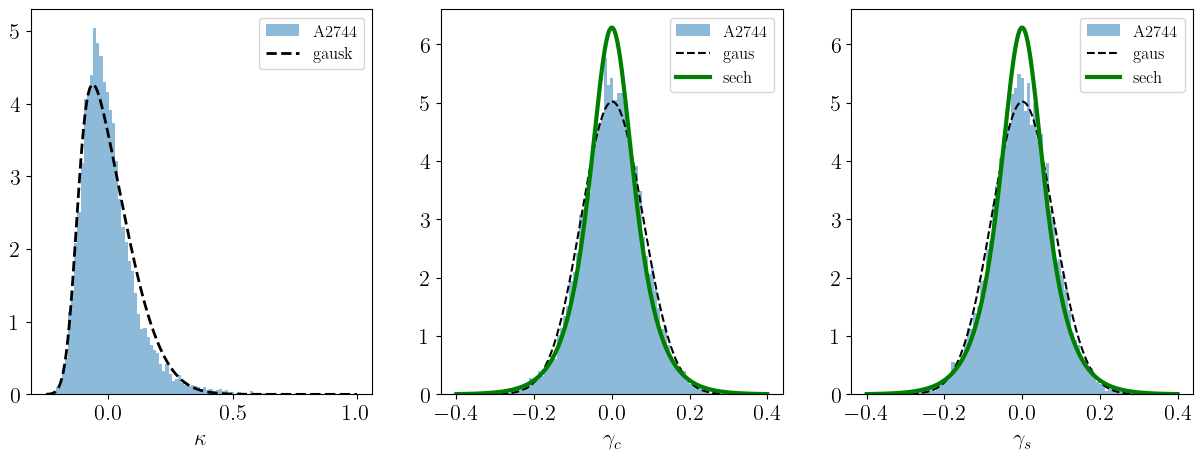

In [6]:
from scipy import stats

kbins = np.linspace(-0.25,1,100)
gbins = np.linspace(-0.4,0.4,100)

kap_a2744 = a2744.kapgam[:,0]
gam_a2744 = a2744.kapgam[:,1:3]
gam_mu = np.mean(gam_a2744)
gam_sg = np.std(gam_a2744)
print('gamma mean,std:',gam_mu,gam_sg)

gam_x = np.linspace(-0.40,0.40,200)
gam_y = np.exp(-0.5*(gam_x-gam_mu)**2/gam_sg**2)/(np.sqrt(2.0*np.pi)*gam_sg)
gam_z = 0.5/(gam_sg*np.cosh(0.5*np.pi*gam_x/gam_sg))
kap_x = np.linspace(-0.25, 1, 200)
params = stats.skewnorm.fit(a2744.kapgam[:,0])
p = stats.skewnorm.pdf(kap_x,params[0],params[1], params[2])
kap_z = 108*0.5*((1 - params[0]*kap_x)**2 + 1)/(2 + params[0]**2)* (1/np.cosh(0.5*np.pi*kap_x/np.std(a2744.kapgam[:,0])))

f,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].hist(a2744.kapgam[:,0],bins=kbins,density=True,alpha=0.5,label='A2744')
ax[0].plot(kap_x, p, 'k', linewidth=2, color = 'black', linestyle = 'dashed',label = 'gausk')
ax[0].set_xlabel(r'$\kappa$')
ax[0].legend(fontsize=12)
ax[1].hist(a2744.kapgam[:,1],bins=gbins,density=True,alpha=0.5,label='A2744')
ax[1].plot(gam_x,gam_y,color='black',linestyle='dashed',label='gaus')
ax[1].plot(gam_x,gam_z,color='green',linewidth=3       ,label='sech')
ax[1].set_xlabel(r'$\gamma_c$')
ax[1].legend(fontsize=12)
ax[2].hist(a2744.kapgam[:,2],bins=gbins,density=True,alpha=0.5,label='A2744')
ax[2].plot(gam_x,gam_y,color='black',linestyle='dashed',label='gaus')
ax[2].plot(gam_x,gam_z,color='green',linewidth=3       ,label='sech')
ax[2].set_xlabel(r'$\gamma_s$')
ax[2].legend(fontsize=12)
f.show()

gamma mean,std: -0.0005913879025694769 0.0765217288107635


C:\Users\abmad\AppData\Local\Temp\ipykernel_38908\613997385.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax[0].plot(kap_x, p, 'k', linewidth=2, color = 'black', linestyle = 'dashed',label = 'gausk')
C:\Users\abmad\AppData\Local\Temp\ipykernel_38908\613997385.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


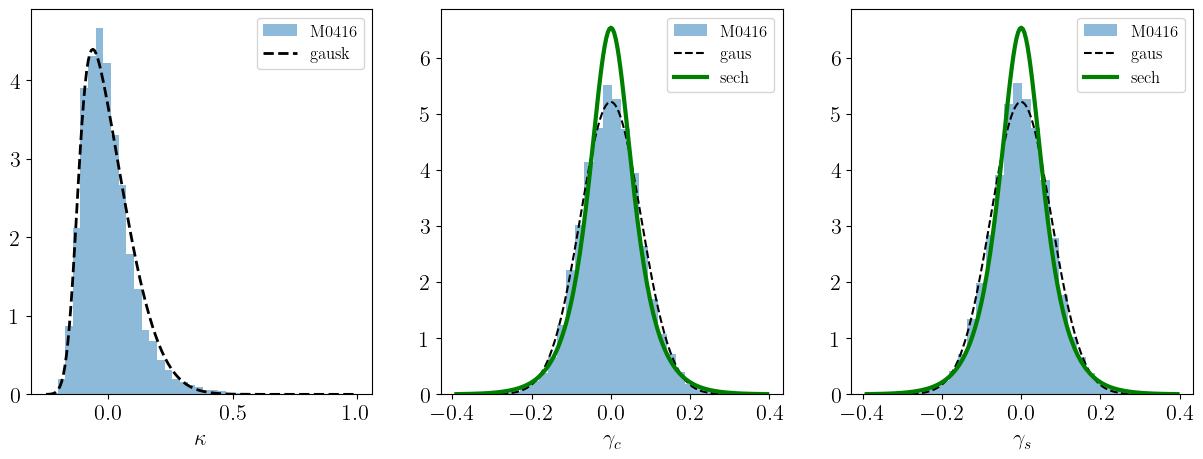

In [7]:
from scipy import stats

kbins = np.linspace(np.min(m0416.kapgam[:,0]),np.max(m0416.kapgam[:,0]),35)
gbins = np.linspace(np.min(m0416.kapgam[:,1:3]),np.max(m0416.kapgam[:,1:3]),35)

kap_m0416 = m0416.kapgam[:,0]
gam_m0416 = m0416.kapgam[:,1:3]
gam_mu = np.mean(gam_m0416)
gam_sg = np.std(gam_m0416)
print('gamma mean,std:',gam_mu,gam_sg)

gam_x = np.linspace(np.min(m0416.kapgam[:,1:3]),np.max(m0416.kapgam[:,1:3]),200)
gam_y = np.exp(-0.5*(gam_x-gam_mu)**2/gam_sg**2)/(np.sqrt(2.0*np.pi)*gam_sg)
gam_z = 0.5/(gam_sg*np.cosh(0.5*np.pi*gam_x/gam_sg))
kap_x = np.linspace(-0.25, 1, 200)
params = stats.skewnorm.fit(m0416.kapgam[:,0])
p = stats.skewnorm.pdf(kap_x,params[0],params[1], params[2])
kap_z = 108*0.5*((1 - params[0]*kap_x)**2 + 1)/(2 + params[0]**2)* (1/np.cosh(0.5*np.pi*kap_x/np.std(m0416.kapgam[:,0])))

f,ax = plt.subplots(1,3,figsize=(15,5))
ax[0].hist(m0416.kapgam[:,0], bins = kbins, density= True,alpha = 0.5, label = 'M0416')
ax[0].plot(kap_x, p, 'k', linewidth=2, color = 'black', linestyle = 'dashed',label = 'gausk')
ax[0].set_xlabel(r'$\kappa$')
ax[0].legend(fontsize=12)
ax[1].hist(m0416.kapgam[:,1],bins=gbins,density=True,alpha=0.5,label='M0416')
ax[1].plot(gam_x,gam_y,color='black',linestyle='dashed',label='gaus')
ax[1].plot(gam_x,gam_z,color='green',linewidth=3       ,label='sech')
ax[1].set_xlabel(r'$\gamma_c$')
ax[1].legend(fontsize=12)
ax[2].hist(m0416.kapgam[:,2],bins=gbins,density=True,alpha=0.5,label='M0416')
ax[2].plot(gam_x,gam_y,color='black',linestyle='dashed',label='gaus')
ax[2].plot(gam_x,gam_z,color='green',linewidth=3       ,label='sech')
ax[2].set_xlabel(r'$\gamma_s$')
ax[2].legend(fontsize=12)
f.show()

In [46]:
print('A744 FG RMS: {:.3e}'.format(np.sqrt(np.sum(np.diag(info_a2744['FG'][1]))/71)))
print('M0416 FG RMS: {:.3e}'.format(np.sqrt(np.sum(np.diag(info['FG'][1]))/95)))

A744 FG RMS: 2.568e-01
M0416 FG RMS: 5.092e-01


## Magnification Analysis

In [8]:
mu1 = np.abs(1/(1 - a2744.kapgam[:,0])**2)
mu2 = np.abs(1/((1 - a2744.kapgam[:,0])**2 - a2744.kapgam[:,1]**2 - a2744.kapgam[:,2]**2))
Mu1 = np.abs(1/(1 - m0416.kapgam[:,0])**2)
Mu2 = np.abs(1/((1 - m0416.kapgam[:,0])**2 - a2744.kapgam[:,1]**2 - a2744.kapgam[:,2]**2))

In [9]:
mu1_v = 1/(1 - a2744.kapgam[:,0])**2
mu2_v = 1/((1 - a2744.kapgam[:,0])**2 - a2744.kapgam[:,1]**2 - a2744.kapgam[:,2]**2)
Mu1_v = 1/(1 - m0416.kapgam[:,0])**2
Mu2_v = 1/((1 - m0416.kapgam[:,0])**2 - a2744.kapgam[:,1]**2 - a2744.kapgam[:,2]**2)

In [10]:
mu1_shorts = []
mu2_shorts = []
Mu1_shorts = []
Mu2_shorts = []

for i in mu1:
    if i < 2:
        mu1_shorts += [i]
    else:
        continue
for i in mu2:
    if i < 2:
        mu2_shorts += [i]
    else:
        continue
for i in Mu1:
    if i < 2:
        Mu1_shorts += [i]
    else:
        continue
for i in Mu2:
    if i < 2:
        Mu2_shorts += [i]
    else:
        continue

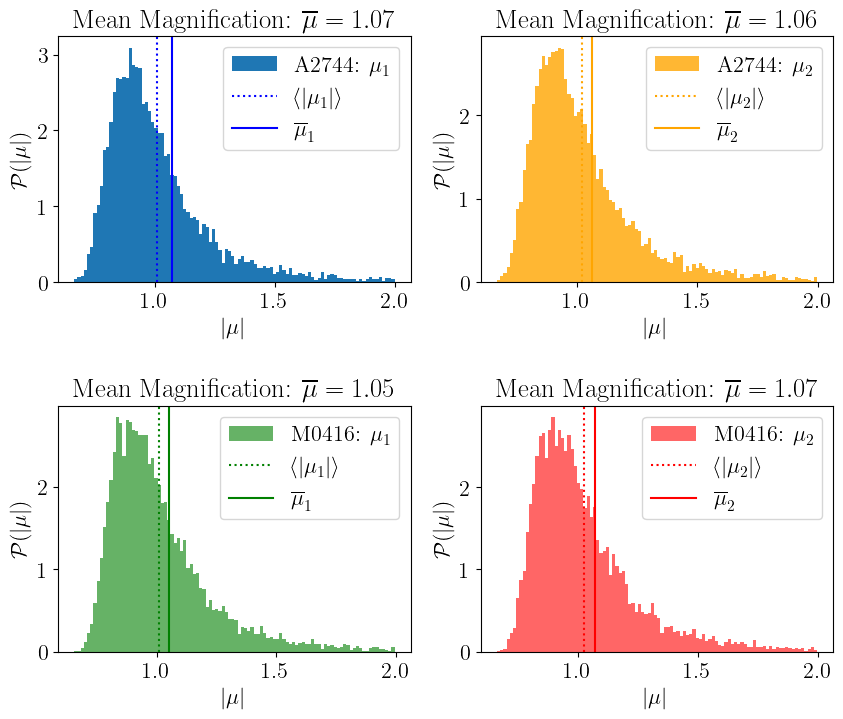

In [11]:
fig, ax = plt.subplots(2, 2, figsize = (10, 8))

ax[0,0].hist(mu1_shorts,bins = 100,density=True,alpha=1,label='A2744: $\mu_1$')
ax[0,0].axvline(x = np.mean(mu1_shorts), color = 'blue',linestyle = 'dotted', label = '$\langle |\mu_{{1}}| \\rangle$')
ax[0,0].axvline(x = np.mean(mu1_v), color = 'blue', label = '$\overline\mu_1$')
ax[0, 0].set_xlabel('$|\mu|$')
ax[0, 0].set_ylabel('$\mathcal{{P}}(|\mu|)$')
ax[0, 0].set_title(r'Mean Magnification: $\overline \mu = {:.2f}$'.format(np.mean(mu1_v)))

ax[0,1].hist(mu2_shorts, bins = 100, density = True, alpha = 0.8, color = 'orange', label = 'A2744: $\mu_2$')
ax[0,1].axvline(x = np.mean(mu2_shorts), color = 'orange',linestyle = 'dotted', label = '$\langle |\mu_{{2}}| \\rangle$')
ax[0,1].axvline(x = np.mean(mu2_v), color = 'orange', label = '$\overline\mu_2$')
ax[0, 1].set_xlabel('$|\mu|$')
ax[0, 1].set_ylabel('$\mathcal{{P}}(|\mu|)$')
ax[0, 1].set_title(r'Mean Magnification: $\overline \mu = {:.2f}$'.format(np.mean(mu2_v)))

ax[1, 0].hist(Mu1_shorts,bins = 100,density=True,alpha=0.6,color = 'green',label='M0416: $\mu_1$')
ax[1,0].axvline(x = np.mean(Mu1_shorts), color = 'green',linestyle = 'dotted', label = '$\langle |\mu_{{1}}| \\rangle$')
ax[1,0].axvline(x = np.mean(Mu1_v), color = 'green', label = '$\overline\mu_1$')
ax[1, 0].set_xlabel('$|\mu|$')
ax[1, 0].set_ylabel('$\mathcal{{P}}(|\mu|)$')
ax[1, 0].set_title(r'Mean Magnification: $\overline \mu = {:.2f}$'.format(np.mean(Mu1_v)))

ax[1, 1].hist(Mu2_shorts, bins = 100, density = True, alpha = 0.6, color = 'red', label = 'M0416: $\mu_2$')
ax[1,1].axvline(x = np.mean(Mu2_shorts), color = 'red',linestyle = 'dotted', label = '$\langle |\mu_{{2}}| \\rangle$')
ax[1,1].axvline(x = np.mean(Mu2_v), color = 'red', label = '$\overline\mu_2$')
ax[1, 1].set_xlabel('$|\mu|$')
ax[1, 1].set_ylabel('$\mathcal{{P}}(|\mu|)$')
ax[1, 1].set_title(r'Mean Magnification: $\overline \mu = {:.2f}$'.format(np.mean(Mu2_v)))

ax[0, 0].legend()
ax[1, 0].legend()
ax[0, 1].legend()
ax[1, 1].legend()

fig.subplots_adjust(hspace=0.5)
plt.show()

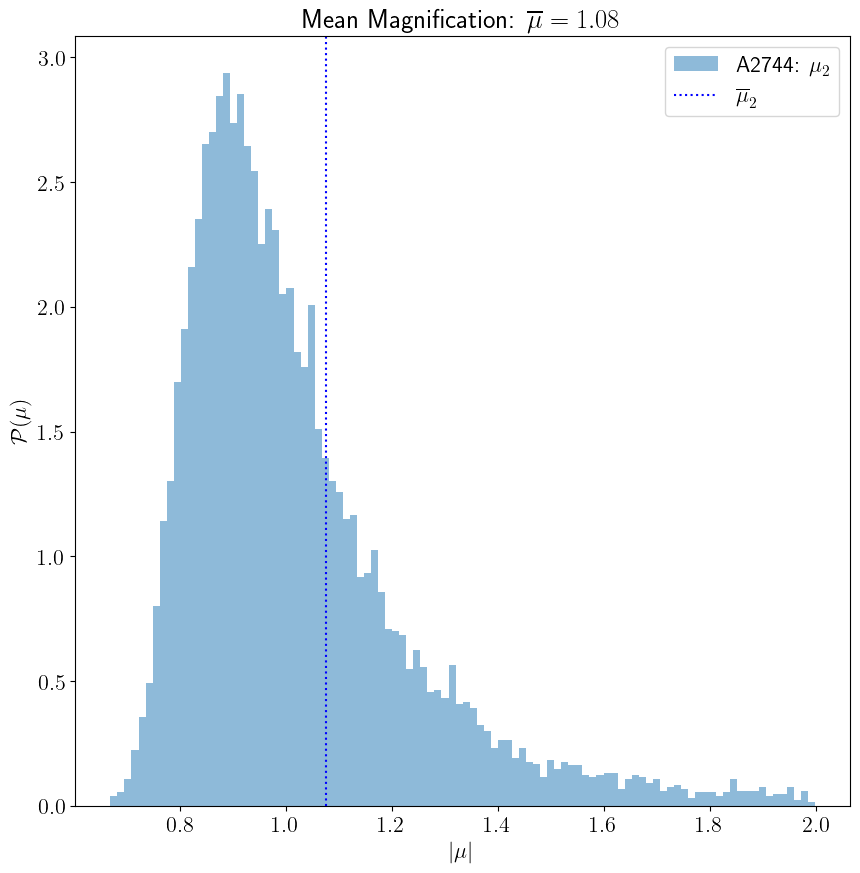

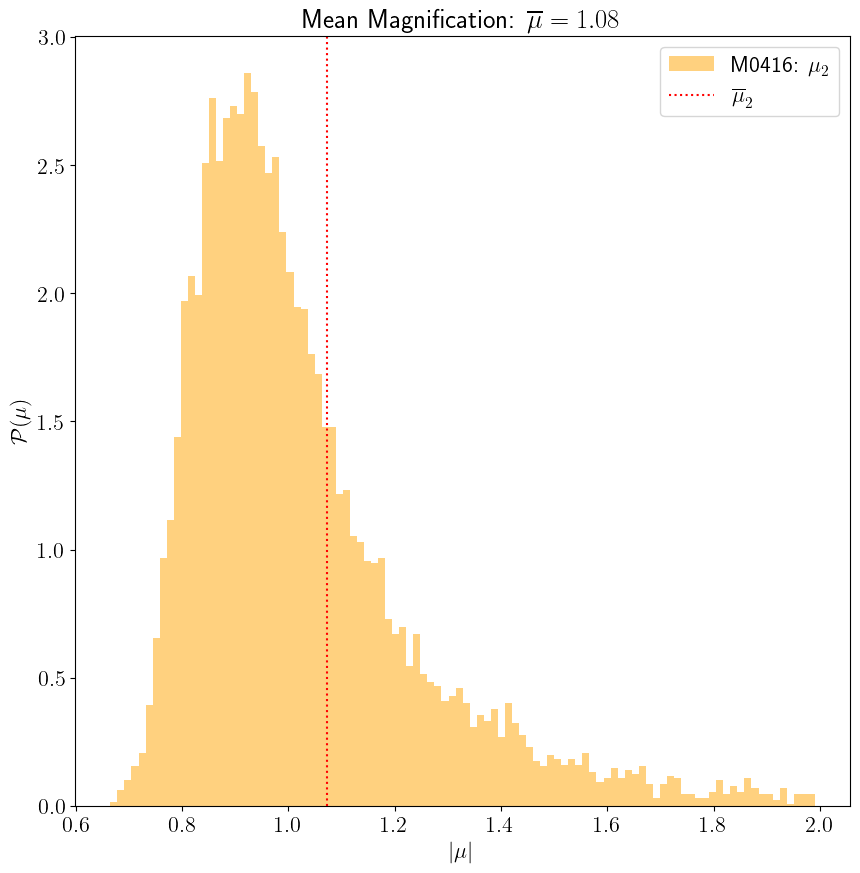

In [42]:
fig, ax = plt.subplots(figsize = (10, 10))

ax.hist(mu2_shorts, bins = 100, density = True, alpha = 0.5, label = 'A2744: $\mu_{{2}}$')
ax.axvline(x = np.mean(mu2_v), color = 'blue', linestyle = 'dotted', label = '$\overline \mu_{{2}}$')
ax.set_xlabel('$|\mu|$')
ax.set_ylabel('$\mathcal{{P}}(\mu)$')
ax.set_title(r'Mean Magnification: $\overline \mu = {:.2f}$'.format(np.mean(mu2_v)))
ax.legend()
##
fig, ax = plt.subplots(figsize = (10, 10))
ax.hist(Mu2_shorts, bins = 100, density = True, alpha = 0.5,color = 'orange', label = 'M0416: $\mu_{{2}}$')
ax.axvline(x = np.mean(Mu2_v), color = 'red', linestyle = 'dotted', label = '$\overline \mu_{{2}}$')
ax.set_xlabel('$|\mu|$')
ax.set_ylabel('$\mathcal{{P}}(\mu)$')
ax.set_title(r'Mean Magnification: $\overline \mu = {:.2f}$'.format(np.mean(mu2_v)))
ax.legend()

plt.show()